In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["n/a","na", "--"]
df = pd.read_csv('https://raw.githubusercontent.com/JF1220/HF-LGCC-/main/NYPD_Hate_Crimes.csv')

# NYC Hate Crime 

Identify which hate crime ranks the highest overall and what year had the most hate crimes

In [3]:
df.head(20)

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,2.019050e+14,2019,3,3/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,3/9/2019,B31682806
1,2.020040e+14,2020,3,3/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,3/28/2020,B32682490
2,2.020040e+14,2020,3,3/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,3/28/2020,B32682492
3,2.020050e+14,2020,7,7/18/2020,45,PATROL BORO BRONX,BRONX,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-BLACK,Race/Color,11/10/2020,B32701468
4,2.021050e+14,2021,4,4/25/2021,50,PATROL BORO BRONX,BRONX,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice,5/1/2021,B33683686
5,2.022050e+14,2022,2,2/15/2022,46,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-FEMALE HOMOSEXUAL (LESBIAN),Sexual Orientation,2/15/2022,B34677119
6,2.019070e+14,2019,1,1/6/2019,70,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,1/6/2019,K31673178
7,2.019090e+14,2019,6,6/10/2019,94,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,6/11/2019,K31702285
8,2.019080e+14,2019,6,6/22/2019,81,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-TRANSGENDER,Gender,7/24/2019,K31709845
9,2.020090e+14,2020,5,5/10/2020,90,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-JEWISH,Religion/Religious Practice,5/10/2020,K32688732


In [4]:
df.shape

(1971, 14)

In [5]:
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

# Cleaning Data

Removing columns not needed for research

In [6]:
drop_cols =['Full Complaint ID', 'Record Create Date', 'Complaint Precinct Code','Patrol Borough Name', 'Arrest Date', 'Arrest Id']

In [7]:
df.drop(drop_cols, inplace = True, axis=1)

In [8]:
df.head()

,Complaint Year Number,Month Number,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
0,2019,3,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
1,2020,3,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color
2,2020,3,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color
3,2020,7,BRONX,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-BLACK,Race/Color
4,2021,4,BRONX,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice


# Comment 

Showcase which month and year had the most arrest, June 2022 had the highest arrest , May 2021 and February 2022 tied for second place. The least amount arrest occured in 2020- Lockdown due to COVID

In [9]:
df.groupby(['Complaint Year Number'])['Offense Category'].count()

Complaint Year Number
2019    447
2020    284
2021    575
2022    665
Name: Offense Category, dtype: int64

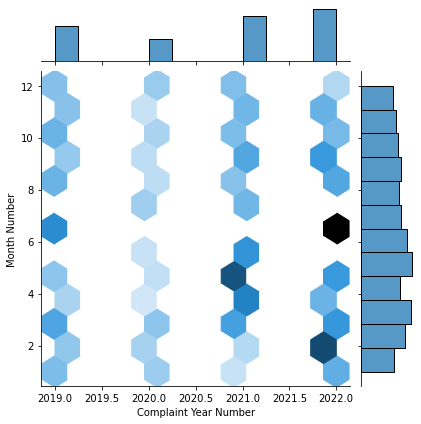

In [10]:
sns.jointplot (x='Complaint Year Number', y= 'Month Number', data=df, kind = 'hex')

In [11]:
df.groupby(['County'])['Law Code Category Description'].count()

County
BRONX       151
KINGS       692
NEW YORK    715
QUEENS      336
RICHMOND     77
Name: Law Code Category Description, dtype: int64

In [12]:
df.groupby(['Law Code Category Description'])['Complaint Year Number'].count()

Law Code Category Description
FELONY            935
INVESTIGATION       2
MISDEMEANOR      1016
VIOLATION          18
Name: Complaint Year Number, dtype: int64

In [13]:
df.groupby(['Offense Category']).count()

,Complaint Year Number,Month Number,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description
Offense Category,,,,,,,
Age,1,1,1,1,1,1,1
Disability,1,1,1,1,1,1,1
Ethnicity/National Origin/Ancestry,119,119,119,119,119,119,119
Gender,71,71,71,71,71,71,71
Race/Color,518,518,518,518,518,518,518
Religion/Religious Practice,980,980,980,980,980,980,980
Sexual Orientation,281,281,281,281,281,281,281


In [14]:
df.groupby(['Bias Motive Description']).count()

,Complaint Year Number,Month Number,County,Law Code Category Description,Offense Description,PD Code Description,Offense Category
Bias Motive Description,,,,,,,
60 YRS AND OLDER,1,1,1,1,1,1,1
ANTI-ARAB,7,7,7,7,7,7,7
ANTI-ASIAN,275,275,275,275,275,275,275
ANTI-BLACK,169,169,169,169,169,169,169
ANTI-BUDDHIST,3,3,3,3,3,3,3
ANTI-CATHOLIC,36,36,36,36,36,36,36
ANTI-EASTERN ORTHODOX,2,2,2,2,2,2,2
ANTI-FEMALE,14,14,14,14,14,14,14
ANTI-FEMALE HOMOSEXUAL (LESBIAN),29,29,29,29,29,29,29


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


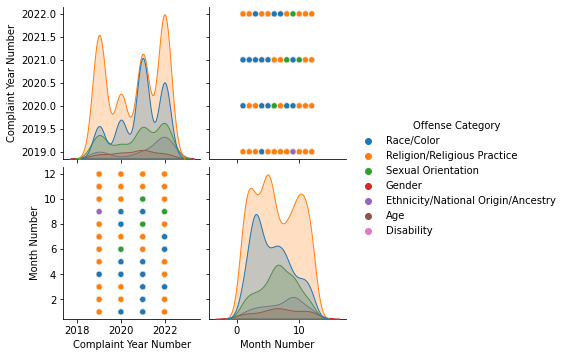

In [15]:
sns.pairplot(df,hue='Offense Category')

# Conclusion 

The 2022 had the most hate crimes, the #1 hate crime is Religion/Religious Practice. The religion with the most attacks is Anti-Jewish, these crimes were higher in the New York district, Misdemeanor being the highest offense type charged. Comparing this data to the least amount of hate crimes would be the year 2022, the Richmond district the offense age (60yrs and older).